------ Loading Boston Houses Dataset ------
Loaded...
Total data points: 506
Feature count: 13
Random parameters, w: [-0.00582805 -0.45984974  2.20289207 -0.18436781  0.68441052 -0.83146728
 -1.04620758  2.09517872  1.55678664 -0.26801787 -0.76436253  0.245613
  0.26229414]
-------------------------------------------





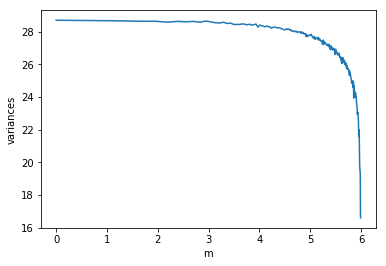

In [58]:
import numpy as np
from sklearn.datasets import load_boston
from scipy.spatial import distance
import matplotlib.pyplot as plt

BATCHES = 50
K = 500

# m is the size of your minibatch. 
# randomly generate minibatches K times,
# and each time compute the gradient.
class BatchSampler(object):
    '''
    A (very) simple wrapper to randomly sample batches without replacement.

    You shouldn't need to touch this.
    '''
    
    def __init__(self, data, targets, batch_size):
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        self.batch_size = batch_size

        self.data = data
        self.targets = targets

        self.indices = np.arange(self.num_points)

    def random_batch_indices(self, m=None):
        '''
        Get random batch indices without replacement from the dataset.

        If m is given the batch will be of size m. Otherwise will default to the class initialized value.
        '''
        if m is None:
            indices = np.random.choice(self.indices, self.batch_size, replace=False)
        else:
            indices = np.random.choice(self.indices, m, replace=False)
        return indices 

    def get_batch(self, m=None):
        '''
        Get a random batch without replacement from the dataset.

        If m is given the batch will be of size m. Otherwise will default to the class initialized value.
        '''
        indices = self.random_batch_indices(m)
        X_batch = np.take(self.data, indices, 0)
        y_batch = self.targets[indices]
        return X_batch, y_batch    


def load_data_and_init_params():
    '''
    Load the Boston houses dataset and randomly initialise linear regression weights.
    '''
    print('------ Loading Boston Houses Dataset ------')
    X, y = load_boston(True)
    features = X.shape[1]

    # Initialize w
    w = np.random.randn(features)

    print("Loaded...")
    print("Total data points: {0}\nFeature count: {1}".format(X.shape[0], X.shape[1]))
    print("Random parameters, w: {0}".format(w))
    print('-------------------------------------------\n\n\n')

    return X, y, w


def cosine_similarity(vec1, vec2):
    '''
    Compute the cosine similarity (cos theta) between two vectors.
    '''
    dot = np.dot(vec1, vec2)
    sum1 = np.sqrt(np.dot(vec1, vec1))
    sum2 = np.sqrt(np.dot(vec2, vec2))

    return dot / (sum1 * sum2)


def lin_reg_gradient(X, y, w):
    '''
    Compute gradient of linear regression model parameterized by w
    '''
    a = (X.T).dot(X).dot(w)
    b = (X.T).dot(y)
    
    return 2*( a - b )

def main():
    # Load data and randomly initialise weights
    X, y, w = load_data_and_init_params()

    #  True gradient
    true_grad = lin_reg_gradient(X, y, w)

    # Create a batch sampler to generate random batches from data
    batch_sampler = BatchSampler(X, y, BATCHES)

    batch_grad = 0
    for i in range(K):
        X_b, y_b = batch_sampler.get_batch()
        batch_grad += lin_reg_gradient(X_b, y_b, w)
    
    batch_grad = batch_grad / K
    
    # compare
    cosine_similarity(true_grad, batch_grad)
    distance.euclidean(true_grad, batch_grad)
    
    
    # For each m, sample a gradient estimate from random batches K times.
    # Using these K values compute the sample variance. 
    m = [i for i in range(1,400,2)]
    variances = []
    for i in m:
        batch_sampler = BatchSampler(X, y, i)

        gradients = []
        for j in range(K):
            X_b, y_b = batch_sampler.get_batch()
            gradients.append(lin_reg_gradient(X_b, y_b, w))

            

        sum_s = 0
        for item in gradients:
            sum_s = np.sum((item - np.array(gradients).mean())**2)
        variance = sum_s / (K-1)
        
        variances.append(variance)

    m.sort(reverse=True)
    plt.plot( np.log(np.array(m)), np.log(np.array(variances)) )
    plt.xlabel('m')
    plt.ylabel('variances')
    plt.show()
    
    


if __name__ == '__main__':
    main()